## Business Understanding

A real estate agency wishes to guide homeowners looking to buy and/or sell their homes. The agency hopes to provide insights to their clients on house pricing with an analysis particularly on how home renovations can have an impact on house pricing in general.

## Data Understanding

The data used for this project is from King County House Sales dataset and it provides housing information such as size, condition, house age among other features. A brief description of the data used for this analysis is provided below
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code

We'll use iterative linear regression process in our analysi where we will be identifying promising predictors from both numeric and categorical features and then develop a baseline and an iterated model that can be used to determine house pricing.


## 1. Data Preparation 
This section aims to preprocess the data before analysis. In this section, we'll be loading the data, exploring the dataset in terms of datatypes, distributions, dropping irrelevant data, addressing missing values, manipulating data into desired forms and engineering new features to aid the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

In [2]:
#loading dataset
data = pd.read_csv('kc_house_data.csv').copy()

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Exploratory Data Analysis and Cleaning

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#dropping irrelevant columns
data.drop(['id', 'date', 'lat', 'long', 'yr_built', 'view', 'zipcode', 'yr_renovated', 'sqft_basement', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

We'll also engineer a new feature, `grade_score`, using the `grade` feature

In [5]:
#engineer a new feature, grade_score, using the grade feature
data['grade_score'] = data['grade'].str.split().apply(lambda x: x[0]).astype(int)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,grade_score
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,8


We can look at the `pandas` data types for this dataset using `.info()`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   grade_score  21597 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 1.6+ MB


Inspecting Null Values in dataset

In [7]:
#inspecting null values
data.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
grade_score       0
dtype: int64

#### Inspecting `waterfront` column

In [8]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

The column `waterfront` has Nan values besides 'YES' and 'NO'. Given that the missing-value proportion is not quite significant on the overall data. We might assume the Nan values as 'NO', operating under the assumption that houses with nan didn't have a waterfront

In [10]:
#assuming NaN values had no waterfront we'll be replacing NaN values with 'NO'
data['waterfront'] = data['waterfront'].fillna('NO')

In [11]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,grade_score
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,7
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,7
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,6
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,7
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,8
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,11
6,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,7
7,291850.0,3,1.50,1060,9711,1.0,NO,Average,7 Average,7
8,229500.0,3,1.00,1780,7470,1.0,NO,Average,7 Average,7
9,323000.0,3,2.50,1890,6560,2.0,NO,Average,7 Average,7


## Building a Baseline Simple Linear Regression Model
### Relational Analysis

In this section, we'll be identifying the feature that is most correlated with `price` and build a `StatsModels` linear regression model using just that feature

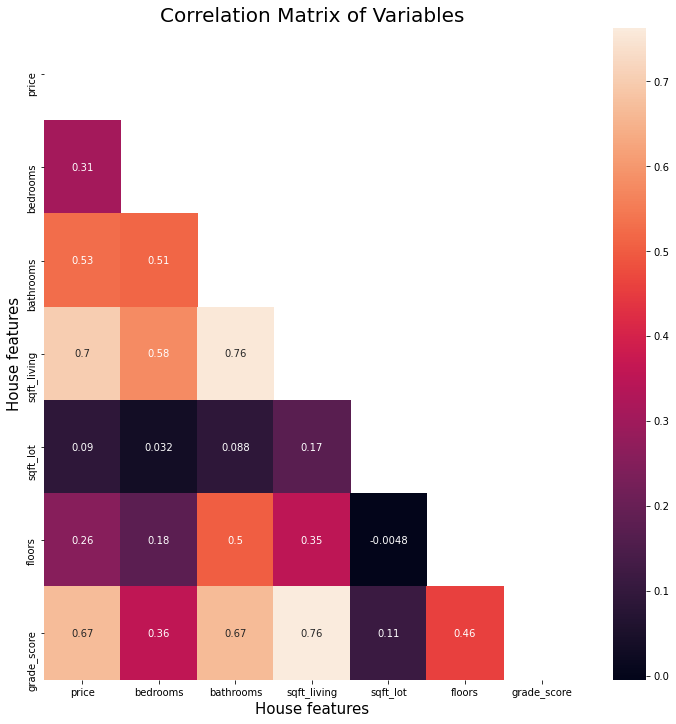

In [12]:
# correlation matrix with duplicated removed
corrMatrix = data.corr()
matrix = np.triu(corrMatrix)

# plot correlation matrix in heat map with seaborn
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corrMatrix, annot=True, mask=matrix)

# label plot
plt.title('Correlation Matrix of Variables', size=20)
plt.xlabel('House features', size=15)
plt.ylabel('House features', size=15)
plt.xticks(size=10)
plt.yticks(size=10);


#### Identifying a Highly Correlated Predictor
The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`

In [13]:
data.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.701917
grade_score    0.667951
bathrooms      0.525906
bedrooms       0.308787
floors         0.256804
sqft_lot       0.089876
Name: price, dtype: float64

`sqft_living` appears to be the column with the strongest correlation

In [14]:
most_correlated = "sqft_living"

In [15]:
#sanity check
# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in data.drop("price", axis=1).columns

#### Plotting the Predictor(sqft_living) vs. Price

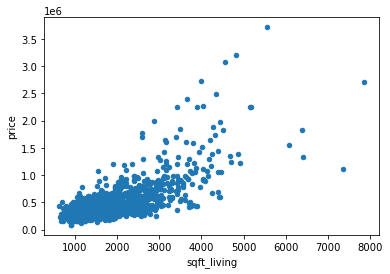

In [16]:
# Plot a sample of 1000 data points, most_correlated vs. price
data.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

#### Setting Up Variables for Regression
Declare y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation.

In [17]:
#setting up variables for regression
y = data["price"]
X_baseline = data[[most_correlated]]

In [18]:
#sanity check

# y should be a series
assert type(y) == pd.Series

# y should contain about 21.5k rows
assert y.shape == (21597,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

#### Creating and Fitting Simple Linear Regression

In [19]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

Below is a visualization of Actual values Vs Predicted Values

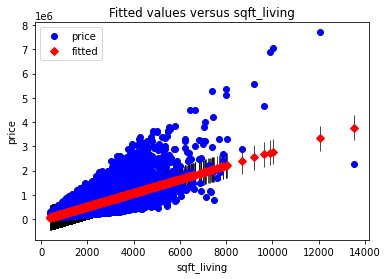

In [20]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

The regression Line:

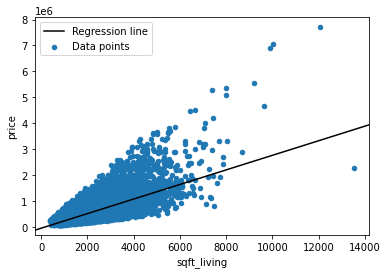

In [21]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

And residuals:

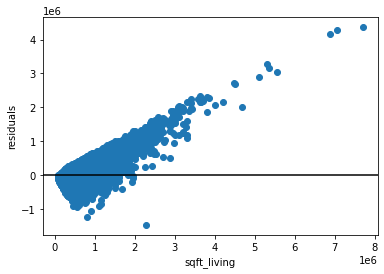

In [22]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## Evaluating and Interpreting Baseline Model Results

In [23]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:48:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [24]:
from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173824.8874961748

**Interpretation:**

`sqft_living`was the attribute most strongly correlated with price, therefore our model is describing this relationship.

Overall, this model is statistically significant with a p-value well below the standard alpha of 0.05 and it explains about 49.3% of the variance in price(***R-Squared***) i.e. coefficient of determination. In a typical prediction, the model is off by about $173k which is not very good.


The intercept is at about -43k dollars.This means that for zero sqft_living our model would predict a price of - 43k dollars.
The coefficient for sqft_living is about 280 dollars. This means for each additional sqft, the sqft_living costs about $280 more.


 ## Preparing a Categorical Feature for Multiple Regression Modeling

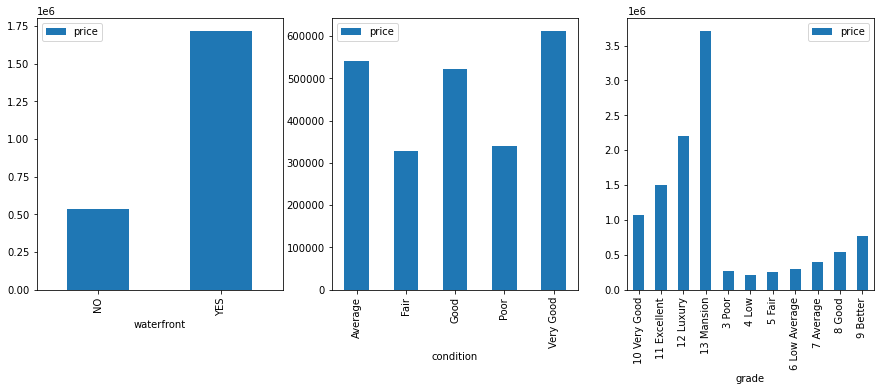

In [25]:
#identifying a promising predictor

categorical_features = data.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(15,5))

for index, feature in enumerate(categorical_features):
    data.groupby(feature).mean(numeric_only=True).plot.bar(
        y="price", ax=axes[index])

In [26]:
cat_col = "grade"

### Setting Up Variables for Regression

The code below creates a variable X_iterated: a DataFrame containing the column with the strongest correlation and the selected categorical feature i.e. `grade`

In [27]:
X_iterated = data[[most_correlated, cat_col]]
X_iterated

,sqft_living,grade
0,1180,7 Average
1,2570,7 Average
2,770,6 Low Average
3,1960,7 Average
4,1680,8 Good
...,...,...
21592,1530,8 Good
21593,2310,8 Good
21594,1020,7 Average
21595,1600,8 Good


In [28]:
# Using pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col])
X_iterated

,sqft_living,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,0,0,0,0,0,0,0,0,1,0,0
1,2570,0,0,0,0,0,0,0,0,1,0,0
2,770,0,0,0,0,0,0,0,1,0,0,0
3,1960,0,0,0,0,0,0,0,0,1,0,0
4,1680,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,0,0,0,0,0,1,0
21593,2310,0,0,0,0,0,0,0,0,0,1,0
21594,1020,0,0,0,0,0,0,0,0,1,0,0
21595,1600,0,0,0,0,0,0,0,0,0,1,0


In [29]:
#sanity check

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = data.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

In [30]:
# "grade_7 average" is the 'average score' so we'll drop that as the baseline
X_iterated.drop("grade_7 Average", axis=1, inplace=True)
# Remove the space in the Very Good column
X_iterated.columns = X_iterated.columns.str.replace(' ','_')
X_iterated

,sqft_living,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_8_Good,grade_9_Better
0,1180,0,0,0,0,0,0,0,0,0,0
1,2570,0,0,0,0,0,0,0,0,0,0
2,770,0,0,0,0,0,0,0,1,0,0
3,1960,0,0,0,0,0,0,0,0,0,0
4,1680,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,0,0,0,0,0,0,0,1,0
21593,2310,0,0,0,0,0,0,0,0,1,0
21594,1020,0,0,0,0,0,0,0,0,0,0
21595,1600,0,0,0,0,0,0,0,0,1,0


We now need to change the boolean values for the 10 "grade" column to 1s and 0s in order for the regression to run

In [31]:
X_iterated.grade_10_Very_Good = X_iterated.grade_10_Very_Good.replace({True:1, False:0})
X_iterated.grade_11_Excellent = X_iterated.grade_11_Excellent.replace({True:1, False:0})
X_iterated.grade_12_Luxury = X_iterated.grade_12_Luxury.replace({True:1, False:0})
X_iterated.grade_13_Mansion = X_iterated.grade_13_Mansion.replace({True:1, False:0})
X_iterated.grade_3_Poor = X_iterated.grade_3_Poor.replace({True:1, False:0})
X_iterated.grade_4_Low = X_iterated.grade_4_Low.replace({True:1, False:0})
X_iterated.grade_5_Fair = X_iterated.grade_5_Fair.replace({True:1, False:0})
X_iterated.grade_6_Low_Average = X_iterated.grade_6_Low_Average.replace({True:1, False:0})
X_iterated.grade_8_Good = X_iterated.grade_8_Good.replace({True:1, False:0})
X_iterated.grade_9_Better = X_iterated.grade_9_Better.replace({True:1, False:0})

In [32]:
#sanity check
# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## Building a Multiple Linear Regression Model

We will build a model called `iterated_model` and a regression results object called `iterated_results` using the `y` variable from our previous model and `X_iterated`

In [33]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

## Evaluating and Interpreting Multiple Linear Regression Model Results

In [34]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:48:37   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21585   BIC:                         5.961e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.369e+05   5

In [35]:
iterated_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iterated)))
baseline_mae, iterated_mae

(173824.8874961748, 156633.68753768198)

In [36]:
baseline_results.rsquared_adj, iterated_results.rsquared_adj

(0.492664406931022, 0.5816087123022546)

In [37]:
"""
Overall the model performed marginally better. We were off by about $156k rather
than $173k in a given prediction, and explained 58.2% rather than 49.3% of the
variance in price.
"""

'\nOverall the model performed marginally better. We were off by about $156k rather\nthan $173k in a given prediction, and explained 58.2% rather than 49.3% of the\nvariance in price.\n'

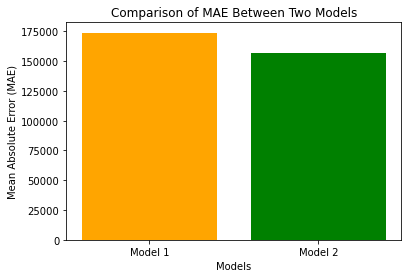

In [38]:
models = ['Model 1', 'Model 2']
mae_values = [baseline_mae, iterated_mae]

plt.bar(models, mae_values, color=['orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE Between Two Models')
plt.show()

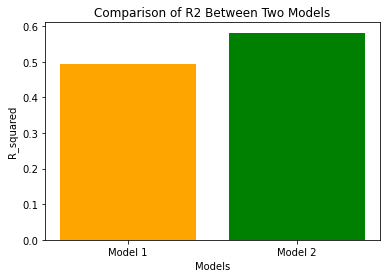

In [39]:
models = ['Model 1', 'Model 2']
r2_values = [baseline_results.rsquared_adj, iterated_results.rsquared_adj]

plt.bar(models, r2_values, color=['orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R_squared')
plt.title('Comparison of R2 Between Two Models')
plt.show()

From the two visualizations, model 2 has a higher R2 and lower mean squared error than the first model, which might be and indication of an improvement in our model

### Model Interpretation
Below are all model coefficients and p-values:

In [40]:
results_df = pd.concat([iterated_results.params, iterated_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df

,coefficient,p-value
const,1.369209e+05,2.052026e-143
sqft_living,1.572485e+02,0.000000e+00
grade_10_Very_Good,3.818647e+05,0.000000e+00
grade_11_Excellent,6.696938e+05,0.000000e+00
grade_12_Luxury,1.204039e+06,0.000000e+00
grade_13_Mansion,2.397146e+06,1.623641e-265
grade_3_Poor,4.330990e+04,8.554008e-01
grade_4_Low,-3.196449e+04,4.860540e-01
grade_5_Fair,-4.302352e+04,5.834561e-03
grade_6_Low_Average,-2.237555e+04,1.893611e-04


Selection of variables to use was dependent on likelyhood of a variable portraying a possible linear relationship with the target variable and how strong the relationship was. Grade also seemed to be representative of the categorical data in our analysis given the nature of the data as it covers most of the renovations.

It is also important to note the coefficients for `grade_8_good` that seems to have a higher impact on price compared to higher grade houses.More investigation of other features is needed to understand whether this can be explained by other variables, or if "Mansions" and other relatively higher grade houses appear to be undervalued vs. the conventional wisdom.

### Conclusion and Recommendations
From the analysis done, it is evident that property features accounted for in our input variables does indeed play a cruicial role in pricing of houses. Visualizations also indicate that better designs and better building materials demand relatively higher prices than average-standard setups. That said, it would be advisable for homeowners to take home maintenance through repairs of worn-out structures to ensure the property condition score is above average at least and investing more into design upgrades under advisement should they consider to sell / buy a house(s). Additional features such as having a waterfront seemed to attrach higher pricing for houses.

### Limitations of the Analysis

**Additional Information**

Additional information not included in the dataset might be helpful for better analysis.

**Design Attribute**

The Analysis shows that grade is the second strongest predictor of price but information of grade is not quite clear cut as it seems to hold 2 things, both design and construction quality. Having a clearer representation of design and construction can help improve the analysis